In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('athlete_events.csv').set_index('ID')

## Checking the Initial Data:

In [3]:
display(df.head())
display(df.tail())
display(df.sample(5))

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
36322,Anders Ruben Forsblom,M,21.0,184.0,83.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Cycling,"Cycling Men's Road Race, Individual",NaN
82875,Yahia Mufarrih,M,23.0,NaN,NaN,Yemen,YEM,1992 Summer,1992,Summer,Barcelona,Judo,Judo Men's Middleweight,NaN
43996,Kemal Arda Grdal,M,22.0,180.0,77.0,Turkey,TUR,2012 Summer,2012,Summer,London,Swimming,Swimming Men's 100 metres Freestyle,NaN
76259,Alexandre Massura Neto,M,25.0,190.0,88.0,Brazil,BRA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Backstroke,NaN
39315,Diana Kay Gee (-McDonnell),F,19.0,162.0,45.0,United States,USA,1988 Summer,1988,Summer,Seoul,Table Tennis,Table Tennis Women's Doubles,NaN


It seems there's a lot of Nan values. It's import to take a further look to see what I can do with it and how many there are actually are.

In [4]:
display(df.shape)
display(df.isna().sum())
print(list(df))

(271116, 14)

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']


In [5]:
quick_look = df.describe()
quick_look = quick_look.drop('Year',axis = 1)
quick_look

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


In [6]:
sport_sex = df.groupby(['Sport','Sex']).mean().reset_index()
df['Height'] = df.groupby(['Sport', 'Sex'])['Height'].transform(lambda x: x.fillna(x.mean()))
df['Weight'] = df.groupby(['Sport', 'Sex'])['Weight'].transform(lambda x: x.fillna(x.mean()))

display(df.head())
sport_sex[sport_sex['Sport'] == 'Football']
display(df.shape)
display(df.isna().sum())

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,177.480339,73.086644,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


(271116, 14)

Name           0
Sex            0
Age         9474
Height       100
Weight       595
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

# Visualization:

### M/F Breakdown

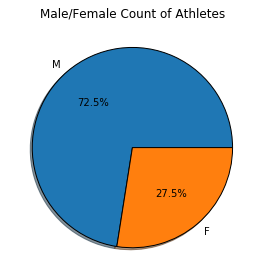

M    196594
F     74522
Name: Sex, dtype: int64

In [7]:
fig, ax = plt.subplots()

sport_sex = df['Sex'].value_counts()
ax.pie(sport_sex,shadow = True,wedgeprops = {'edgecolor':'black'},autopct='%1.1f%%',labels =['M','F'])
ax.set_title('Male/Female Count of Athletes')

plt.tight_layout()
plt.show()
sport_sex

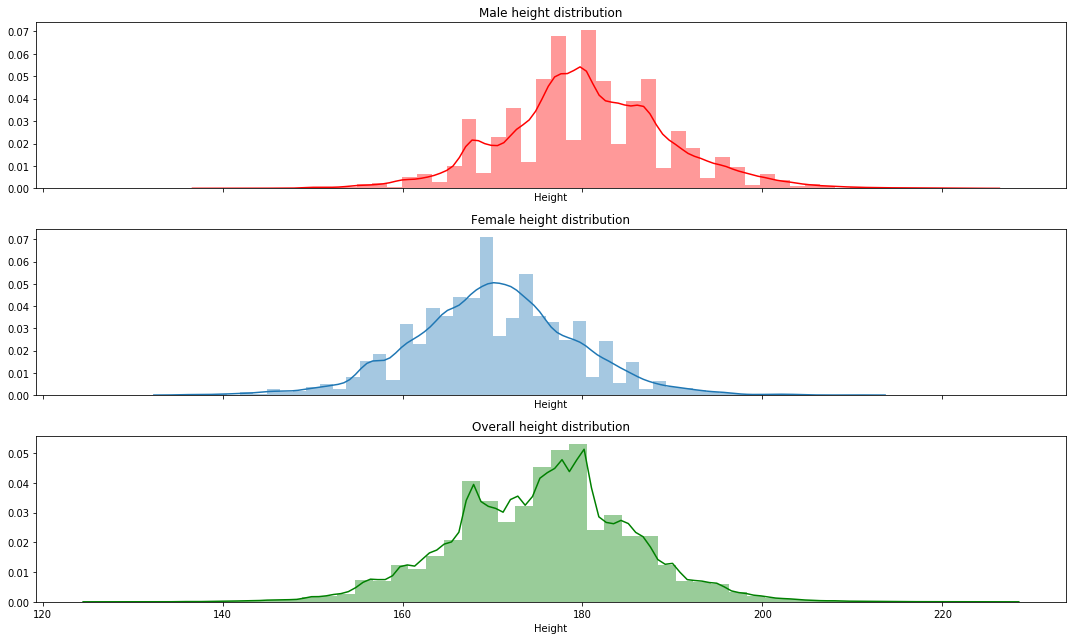

In [8]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 3, ncols=1, figsize= (15,9),sharex = True)

m = df[df['Sex'] =='M'].dropna()
f = df[df['Sex'] =='F'].dropna()

sns.distplot(m['Height'],ax=ax1,color='red')
sns.distplot(f['Height'],ax=ax2)
sns.distplot(df['Height'].dropna(),ax=ax3,color ='green')

ax1.set_title('Male height distribution')
ax2.set_title('Female height distribution')
ax3.set_title('Overall height distribution')

plt.tight_layout()
plt.show()

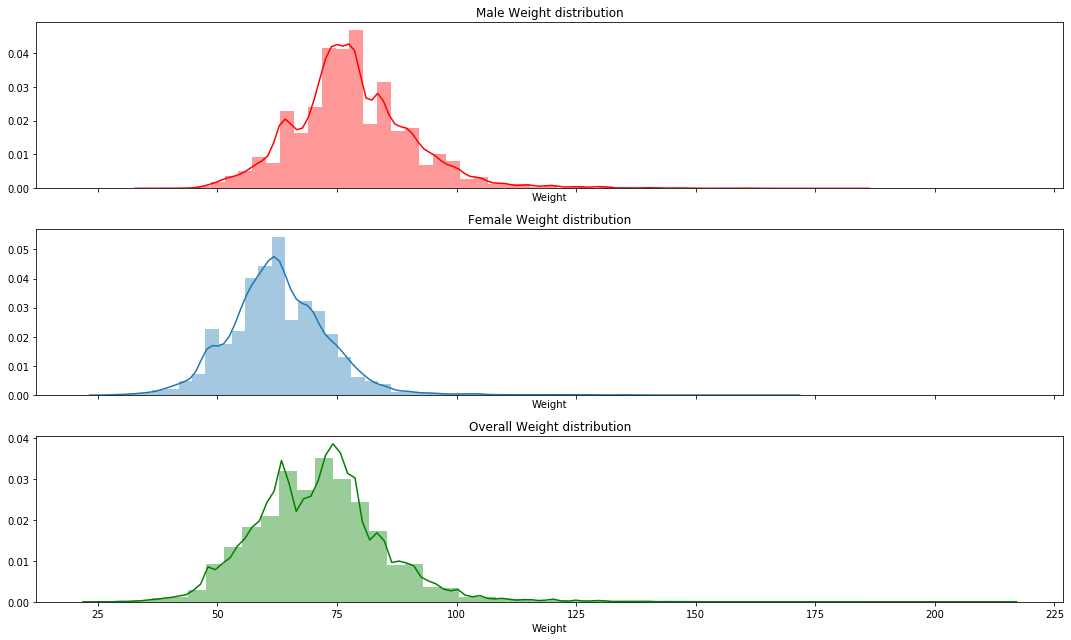

In [9]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 3, ncols=1, figsize= (15,9),sharex = True)

m = df[df['Sex'] =='M'].dropna()
f = df[df['Sex'] =='F'].dropna()

sns.distplot(m['Weight'],ax=ax1,color='red')
sns.distplot(f['Weight'],ax=ax2)
sns.distplot(df['Weight'].dropna(),ax=ax3,color ='green')

ax1.set_title('Male Weight distribution')
ax2.set_title('Female Weight distribution')
ax3.set_title('Overall Weight distribution')

plt.tight_layout()
plt.show()

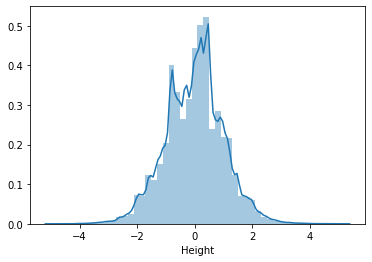

In [10]:
heights = df['Height'].reset_index()
heights_normal=(heights-heights.mean())/heights.std()
sns.distplot(heights_normal['Height'].dropna())

plt.show()

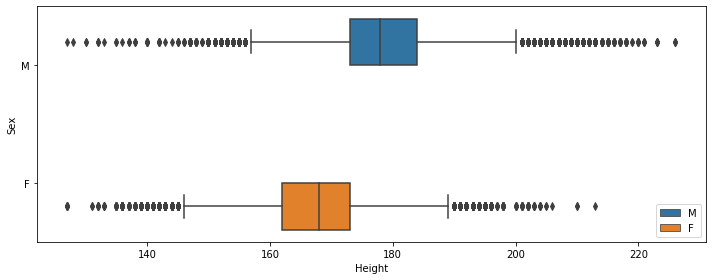

In [11]:
fig, ax= plt.subplots(figsize = (10,4))

sns.boxplot(y="Sex", x="Height", data=df,hue = 'Sex')

plt.legend()
plt.tight_layout()
plt.show()

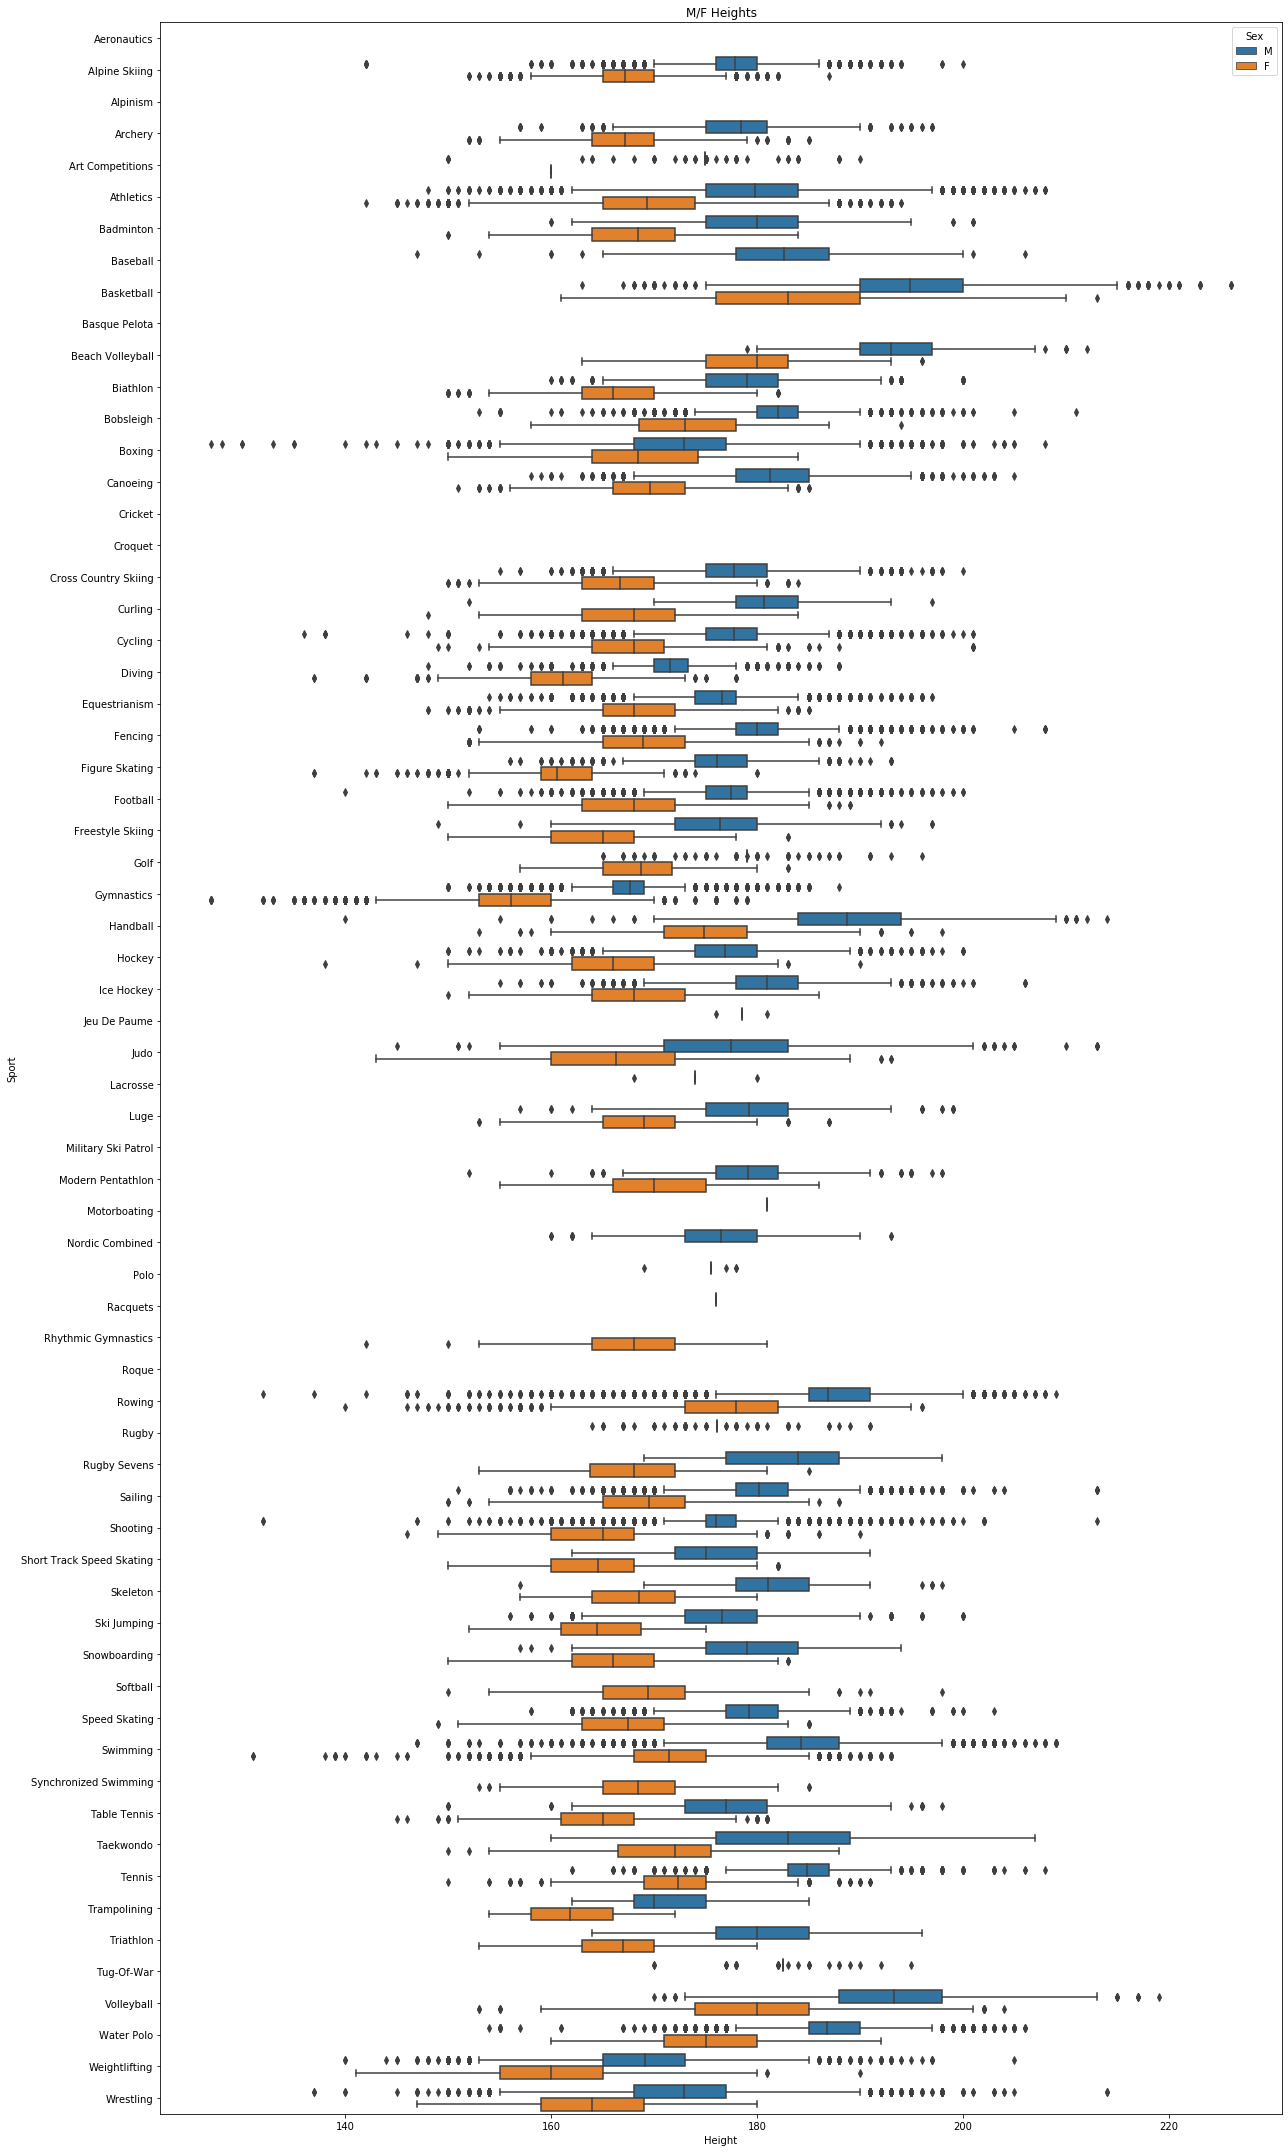

In [12]:
fig, ax = plt.subplots(figsize = (18,30))

sns.boxplot(y = 'Sport', x='Height',data = df.sort_values(['Sport']), hue ='Sex')

ax.set_title('M/F Heights')

plt.tight_layout()
plt.show()

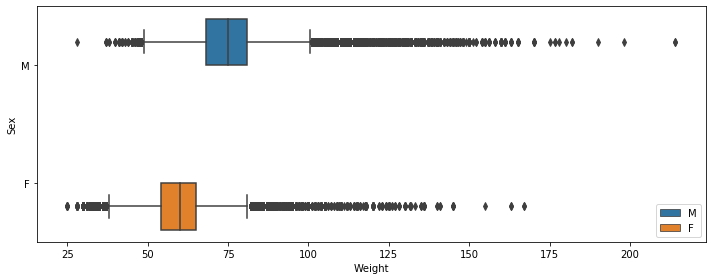

In [13]:
fig, ax= plt.subplots(figsize = (10,4))

sns.boxplot(y="Sex", x="Weight", data=df,hue = 'Sex')

plt.legend()
plt.tight_layout()
plt.show()

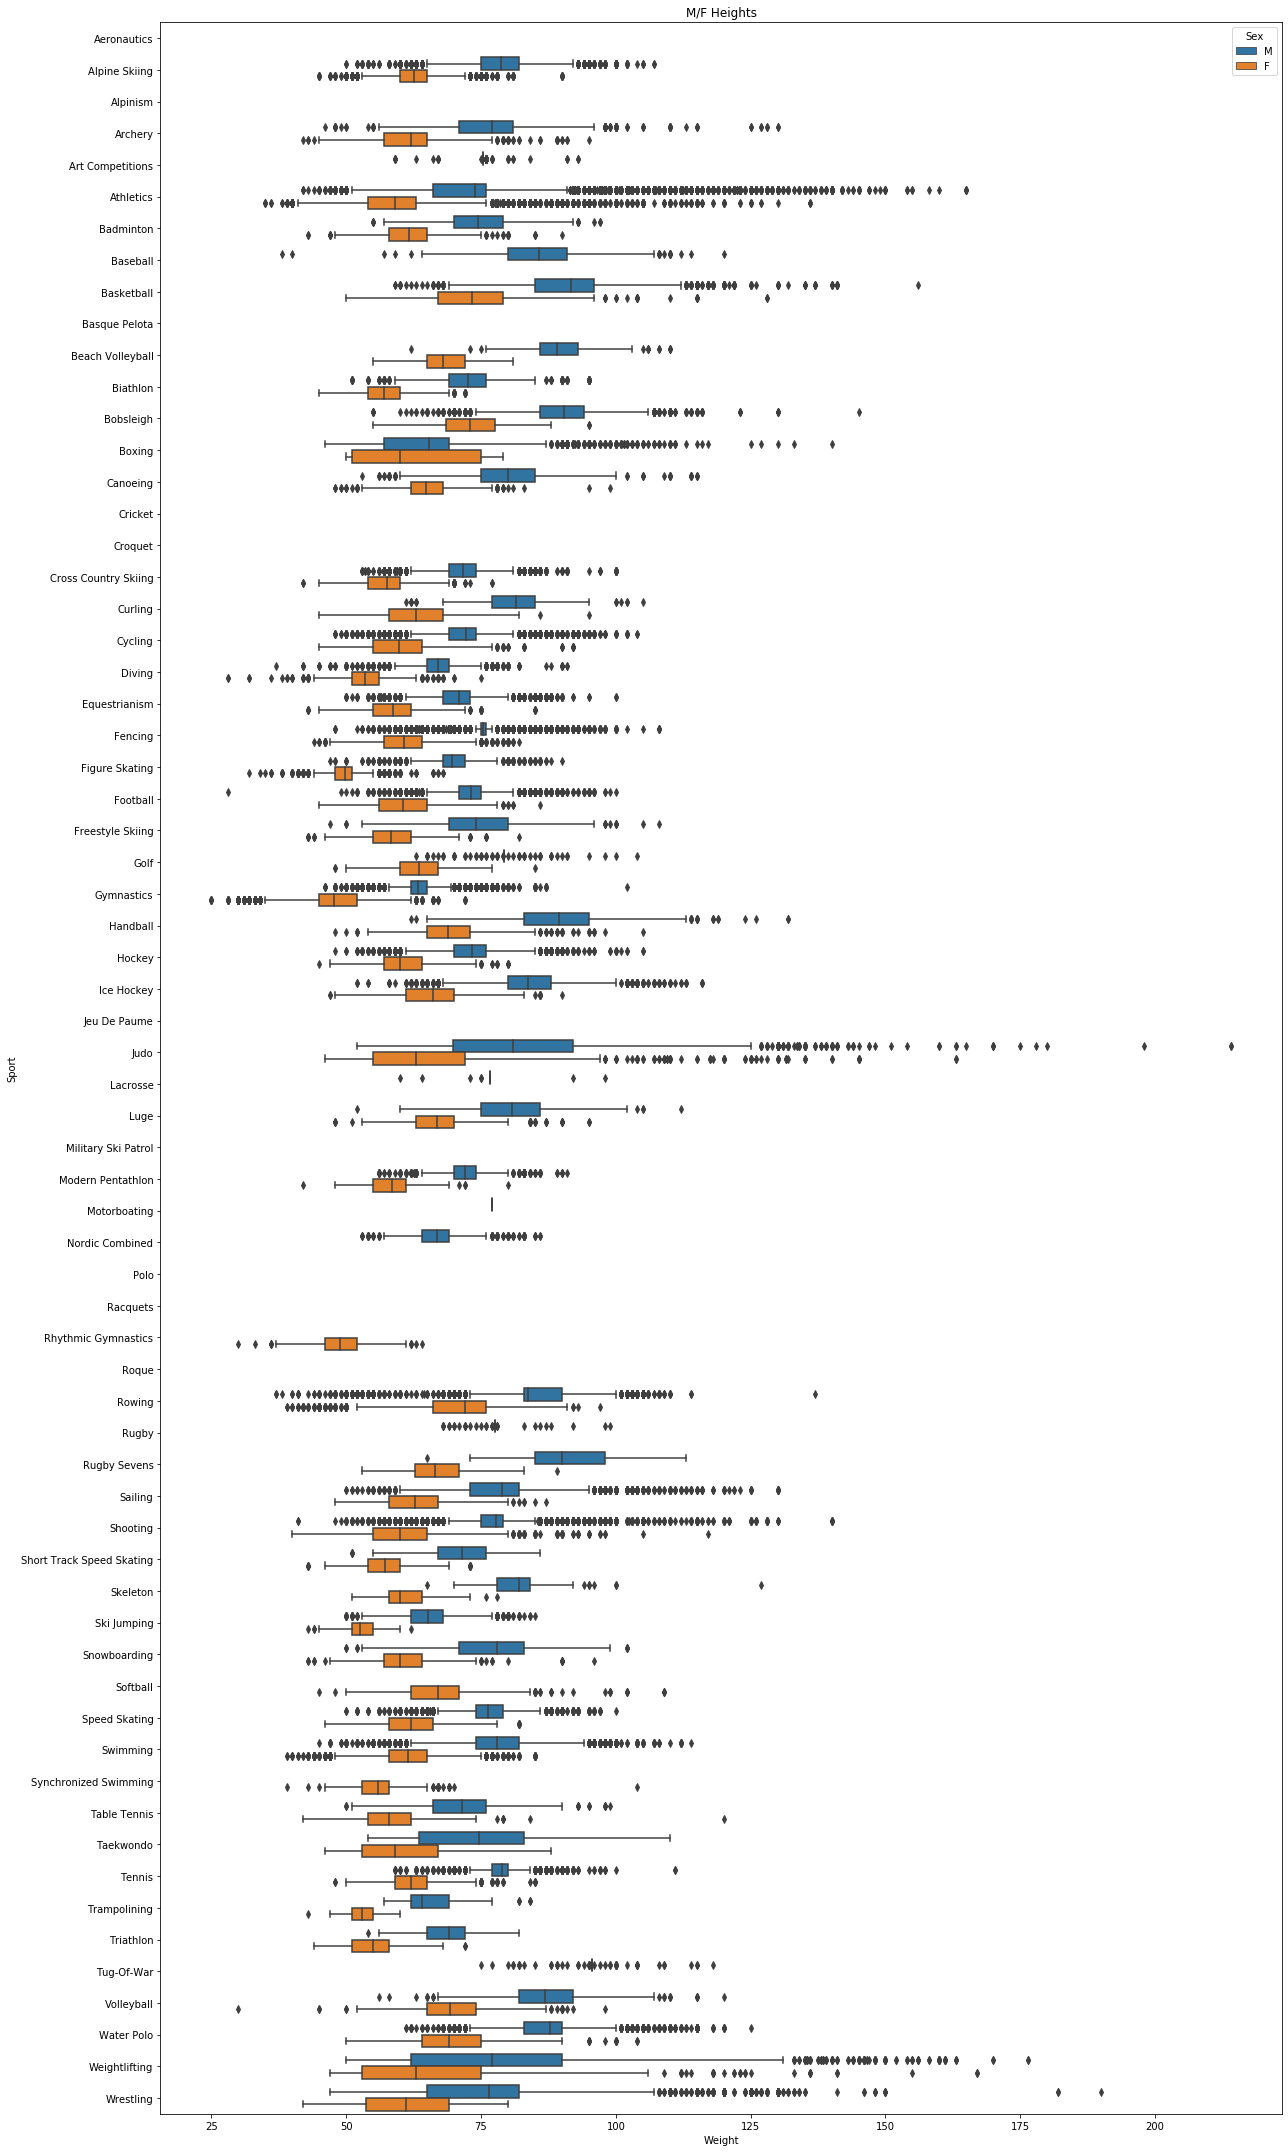

In [14]:
fig, ax = plt.subplots(figsize = (18,30))

sns.boxplot(y = 'Sport', x='Weight',data = df.sort_values(['Sport']), hue ='Sex')

ax.set_title('M/F Heights')

plt.tight_layout()
plt.show()

# Winners:

In [15]:
team = df.groupby('Team')['Medal'].agg('count').sort_values(ascending = False).reset_index().head(10)
team.index +=1

gold = df[df['Medal'] == 'Gold'].groupby('Team')['Medal'].agg('count').sort_values(ascending = False).reset_index()
gold.index +=1

silver = df[df['Medal'] == 'Silver'].groupby('Team')['Medal'].agg('count').sort_values(ascending = False).reset_index()
silver.index +=1

bronze = df[df['Medal'] == 'Bronze'].groupby('Team')['Medal'].agg('count').sort_values(ascending = False).reset_index()
bronze.index +=1

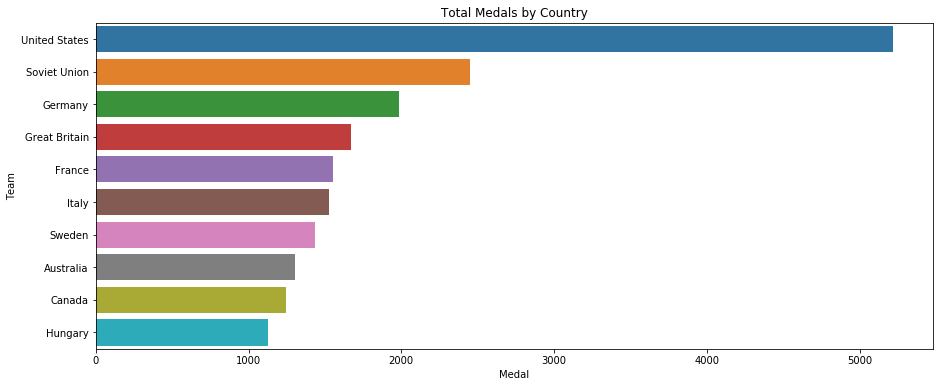

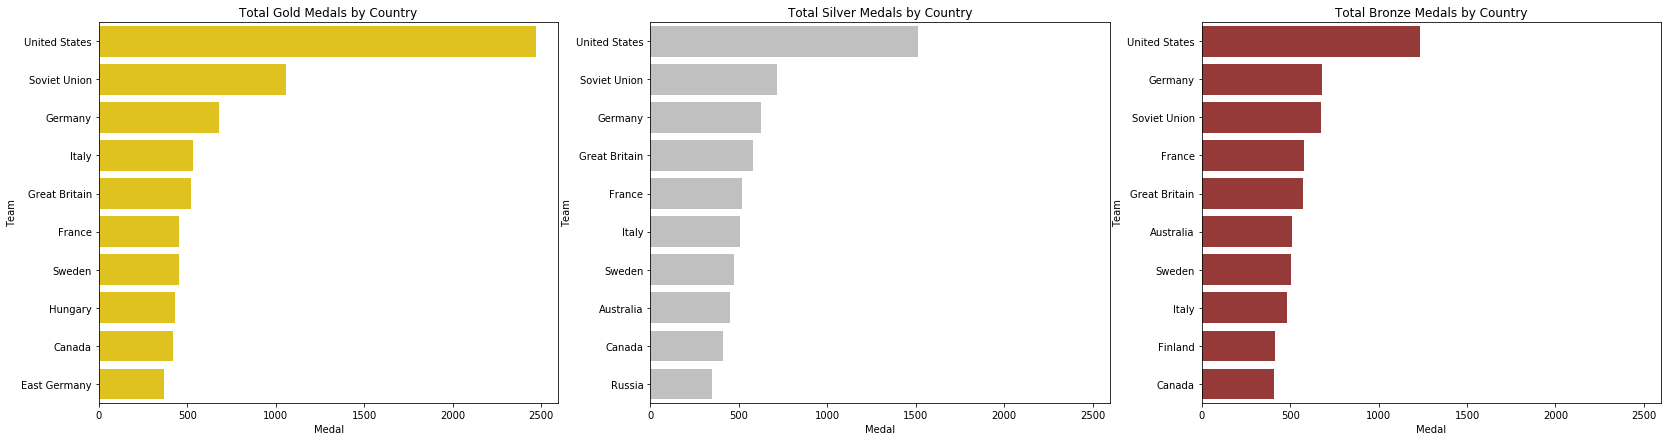

In [16]:
fig,ax = plt.subplots(figsize = (15,6))
fig,(ax1,ax2,ax3) = plt.subplots(ncols = 3, nrows=1,figsize = (28,7),sharex = True)

sns.barplot(data = team, x = 'Medal', y ='Team',ax = ax)
ax.set_title('Total Medals by Country')

sns.barplot(data = gold.head(10), x = 'Medal', y ='Team',ax = ax1,color = 'Gold')
ax1.set_title('Total Gold Medals by Country')

sns.barplot(data = silver.head(10), x = 'Medal', y ='Team',ax = ax2,color ='Silver')
ax2.set_title('Total Silver Medals by Country')

sns.barplot(data = bronze.head(10), x = 'Medal', y ='Team',ax = ax3,color ='Brown')
ax3.set_title('Total Bronze Medals by Country')

plt.show()

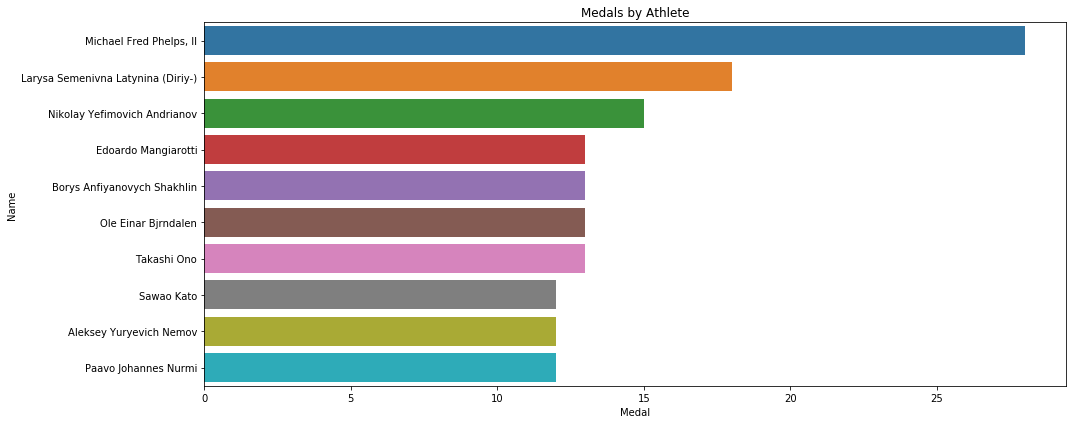

In [17]:
person = df.groupby('Name')['Medal'].agg('count').sort_values(ascending = False).reset_index().head(10)
person.index +=1

fig,ax = plt.subplots(figsize = (15,6))
sns.barplot(data = person, x = 'Medal', y ='Name',ax = ax)
ax.set_title('Medals by Athlete')

plt.tight_layout()
plt.show()

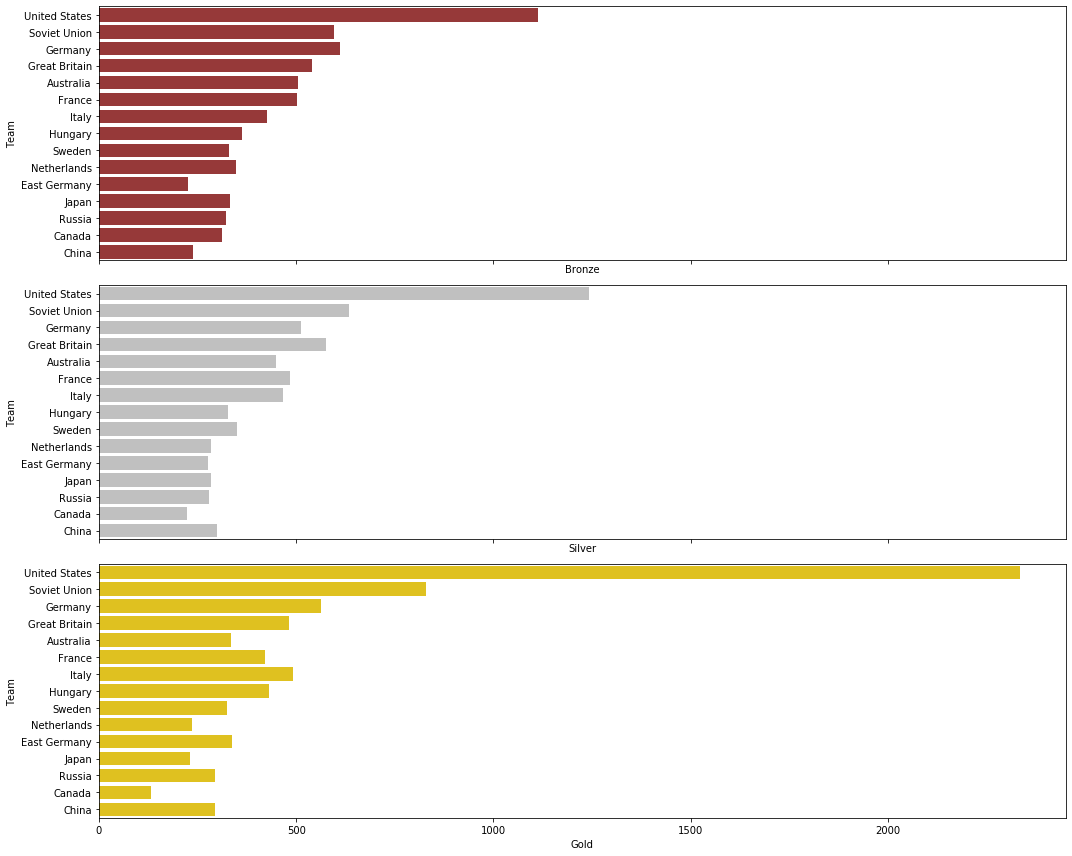

In [18]:
summer = df[df['Season'] =='Summer']

summer = summer.groupby(['Team','Medal'])['Medal'].agg('count').sort_values(ascending = False).unstack().head(15).reset_index()

fig,(ax1,ax2,ax3) = plt.subplots(ncols =1, nrows =3, figsize = (15,12),sharex = True)

sns.barplot(data = summer, y = 'Team', x ='Bronze',ax =ax1,color ='Brown')
sns.barplot(data = summer, y = 'Team', x ='Silver',ax =ax2,color ='Silver')
sns.barplot(data = summer, y = 'Team', x ='Gold',ax =ax3,color ='Gold')

ax.set_title('Summer Medal Breakdown')

plt.tight_layout()
plt.show()

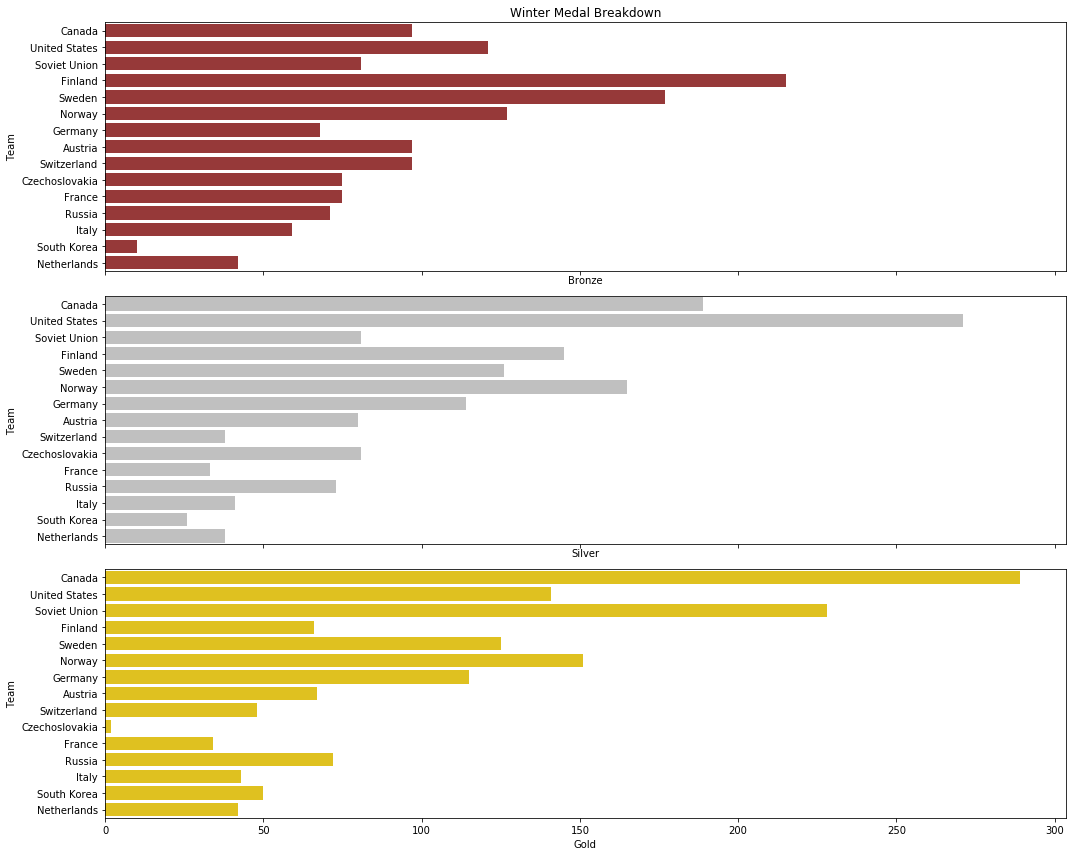

In [19]:
winter = df[df['Season'] =='Winter']
winter = winter.groupby(['Team','Medal'])['Medal'].agg('count').sort_values(ascending = False).unstack().head(15).reset_index()

fig,(ax1,ax2,ax3) = plt.subplots(ncols =1, nrows =3, figsize = (15,12),sharex = True)

sns.barplot(data = winter, y = 'Team', x ='Bronze',ax =ax1,color ='Brown')
sns.barplot(data = winter, y = 'Team', x ='Silver',ax =ax2,color ='Silver')
sns.barplot(data = winter, y = 'Team', x ='Gold',ax =ax3,color ='Gold')

ax1.set_title('Winter Medal Breakdown')

plt.tight_layout()
plt.show()

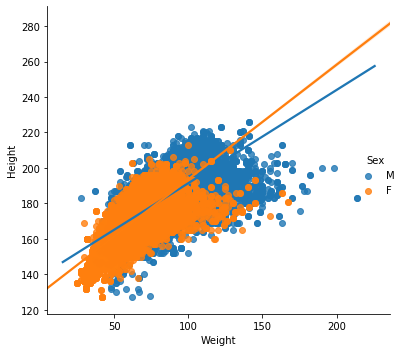

In [49]:
sns.lmplot(data = df, x ='Weight',y = 'Height', hue ='Sex')
ax.set_title('Corr Weight/Height')

plt.tight_layout()
plt.show()

In [58]:
df

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,177.480339,73.086644,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135569,Andrzej ya,M,29.0,179.000000,89.000000,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
135570,Piotr ya,M,27.0,176.000000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
135570,Piotr ya,M,27.0,176.000000,59.000000,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
